## Prediction Using Decision Tree Algorithm
`GRIP @ The Sparks Foundation`
## Author : Bhaskar Das
[bhaskar.jnvd@gmail.com]()

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

### Technical Stack : Scikit Learn, Numpy, Pandas, Seaborn, Matplotlib, Pydot

## Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pydot
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sum
from IPython.display import Image

## Loading the Dataset

In [7]:
iris =  load_iris()
X = iris.data[ :, :]
y = iris.target

## Exploratory Data Analysis (EDA)

In [11]:
df =pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
df['Species']=iris['target']
df['Species']=df['Species'].apply(lambda x: iris['target_names'][x])
df.sample(5) #random selection

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica
11,4.8,3.4,1.6,0.2,setosa
85,6.0,3.4,4.5,1.6,versicolor
6,4.6,3.4,1.4,0.3,setosa


### Finding shape of the dataset using shape()

In [10]:
df.shape

(150, 5)

Thus we have 150 rows and 5 colmns

In [15]:
df.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.isna().sum()

Petal length    0
Petal Width     0
Sepal Length    0
Sepal Width     0
Species         0
dtype: int64

We do not have any missing values.

## Data Visualization and Comparing Features

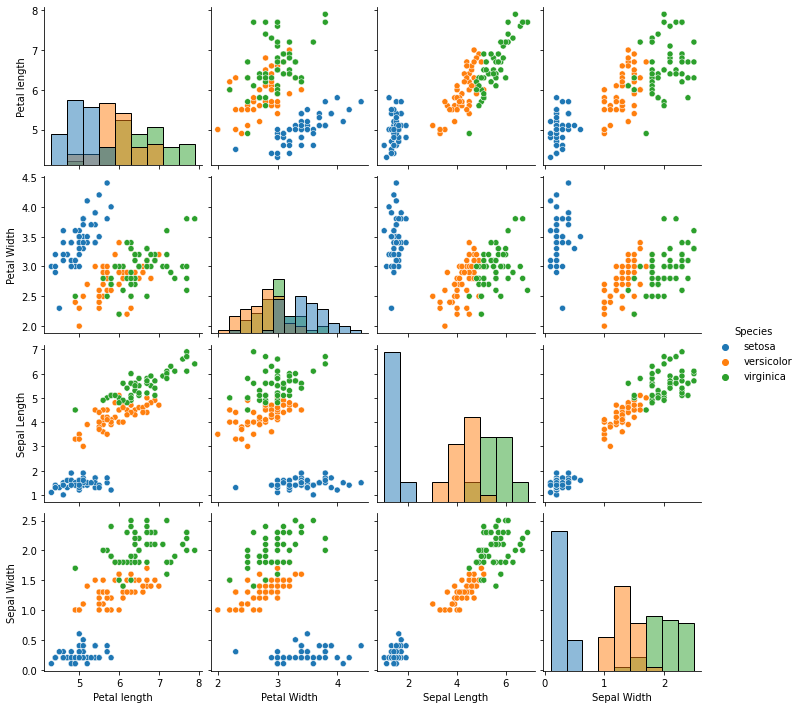

In [22]:
sns.pairplot(df, hue='Species', diag_kind='hist');

## Model Trainning

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

y_pred = tree_classifier.predict(X_test)

## Actual and Predicted flower classification comparison

In [28]:
df2 = pd.DataFrame({'Actual': y_test,'Predicted' : y_pred})
df2.sample(5)

,Actual,Predicted
26,0,0
3,0,0
8,2,2
2,2,2
23,1,1


## Visualizing the Trained Model

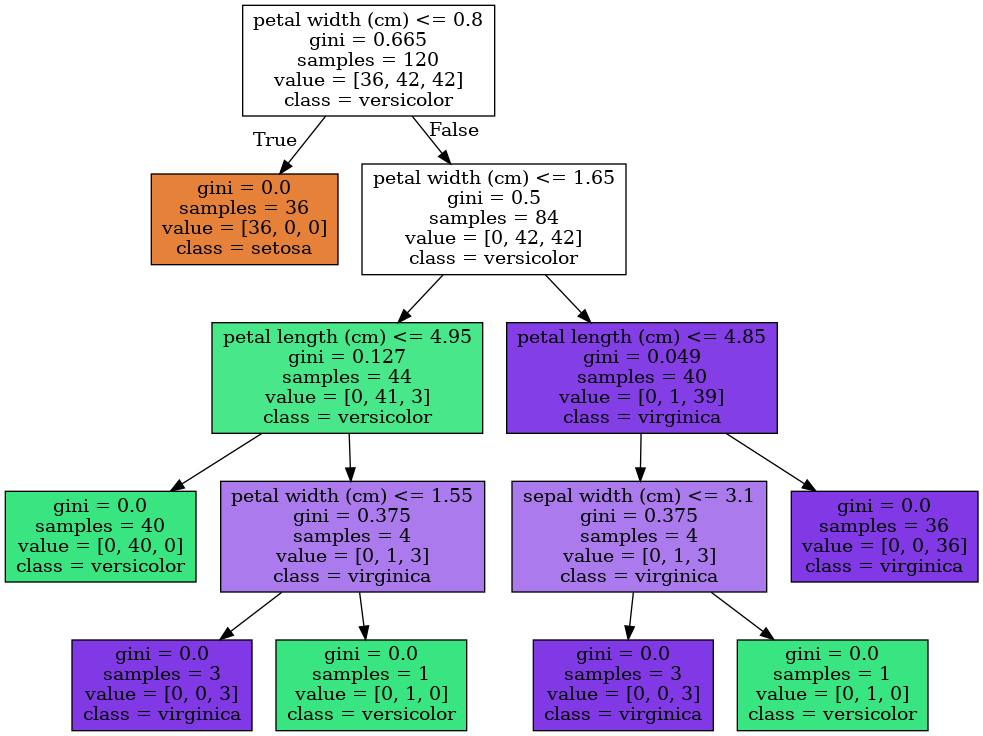

In [53]:
export_graphviz(
    tree_classifier,
    out_file = 'tree.dot',
    feature_names = iris.feature_names[:],
    class_names = iris.target_names,
    filled = np.True_
)
(graph,) = pydot.graph_from_dot_file('tree.dot')
Image(filename='tree.png')